In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import os
import numpy as np

## Text Summarization Metrics Diagrams

In [35]:
csv_dir = "./results"
all_files = [os.path.join(csv_dir, f) for f in os.listdir(csv_dir)]

# Combine all files into a single DataFrame
df_all = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)

# Get available subjects
subjects = df_all['Subject'].unique().tolist()

# Dropdown to choose subject
dropdown = widgets.Dropdown(
    options=subjects,
    description='Subject:',
    value=subjects[0],
    layout=widgets.Layout(width='50%')
)

In [36]:
def plot_text_summ_metrics(subject):
    df = df_all[df_all['Subject'] == subject].copy()

    # Average ROUGE values
    df['ROUGE_Precision_avg'] = df[['ROUGE-1 Precision', 'ROUGE-2 Precision', 'ROUGE-L Precision']].mean(axis=1)
    df['ROUGE_Recall_avg'] = df[['ROUGE-1 Recall', 'ROUGE-2 Recall', 'ROUGE-L Recall']].mean(axis=1)
    df['ROUGE_F1_avg'] = df[['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1']].mean(axis=1)

    # Select relevant columns
    df_plot = df[['Model', 'BLEU', 'METEOR', 'ROUGE_Precision_avg', 'ROUGE_Recall_avg', 'ROUGE_F1_avg']]
    df_melted = pd.melt(df_plot, id_vars='Model', var_name='Metric', value_name='Score')

    # Plot
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Model Comparison on Subject: "{subject}"')
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

In [37]:
widgets.interact(plot_text_summ_metrics, subject=dropdown)

interactive(children=(Dropdown(description='Subject:', layout=Layout(width='50%'), options=('football', 'IT', …

<function __main__.plot_text_summ_metrics(subject)>

In [38]:
def plot_text_summ_metrics_averages():
    # Calculate average values for all subjects and models
    df_avg = df_all.copy()
    
    # Average ROUGE values for all models
    df_avg['ROUGE_Precision_avg'] = df_avg[['ROUGE-1 Precision', 'ROUGE-2 Precision', 'ROUGE-L Precision']].mean(axis=1)
    df_avg['ROUGE_Recall_avg'] = df_avg[['ROUGE-1 Recall', 'ROUGE-2 Recall', 'ROUGE-L Recall']].mean(axis=1)
    df_avg['ROUGE_F1_avg'] = df_avg[['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1']].mean(axis=1)

    # Group by Model and calculate mean per model
    df_avg_grouped = df_avg.groupby('Model')[['BLEU', 'METEOR', 'ROUGE_Precision_avg', 'ROUGE_Recall_avg', 'ROUGE_F1_avg']].mean().reset_index()

    # Plot overall average metrics
    df_melted_avg = pd.melt(df_avg_grouped, id_vars='Model', var_name='Metric', value_name='Average Score')
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted_avg, x='Metric', y='Average Score', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Average Model Performance Across All Subjects')
    plt.xlabel('Metrics')
    plt.ylabel('Average Scores')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

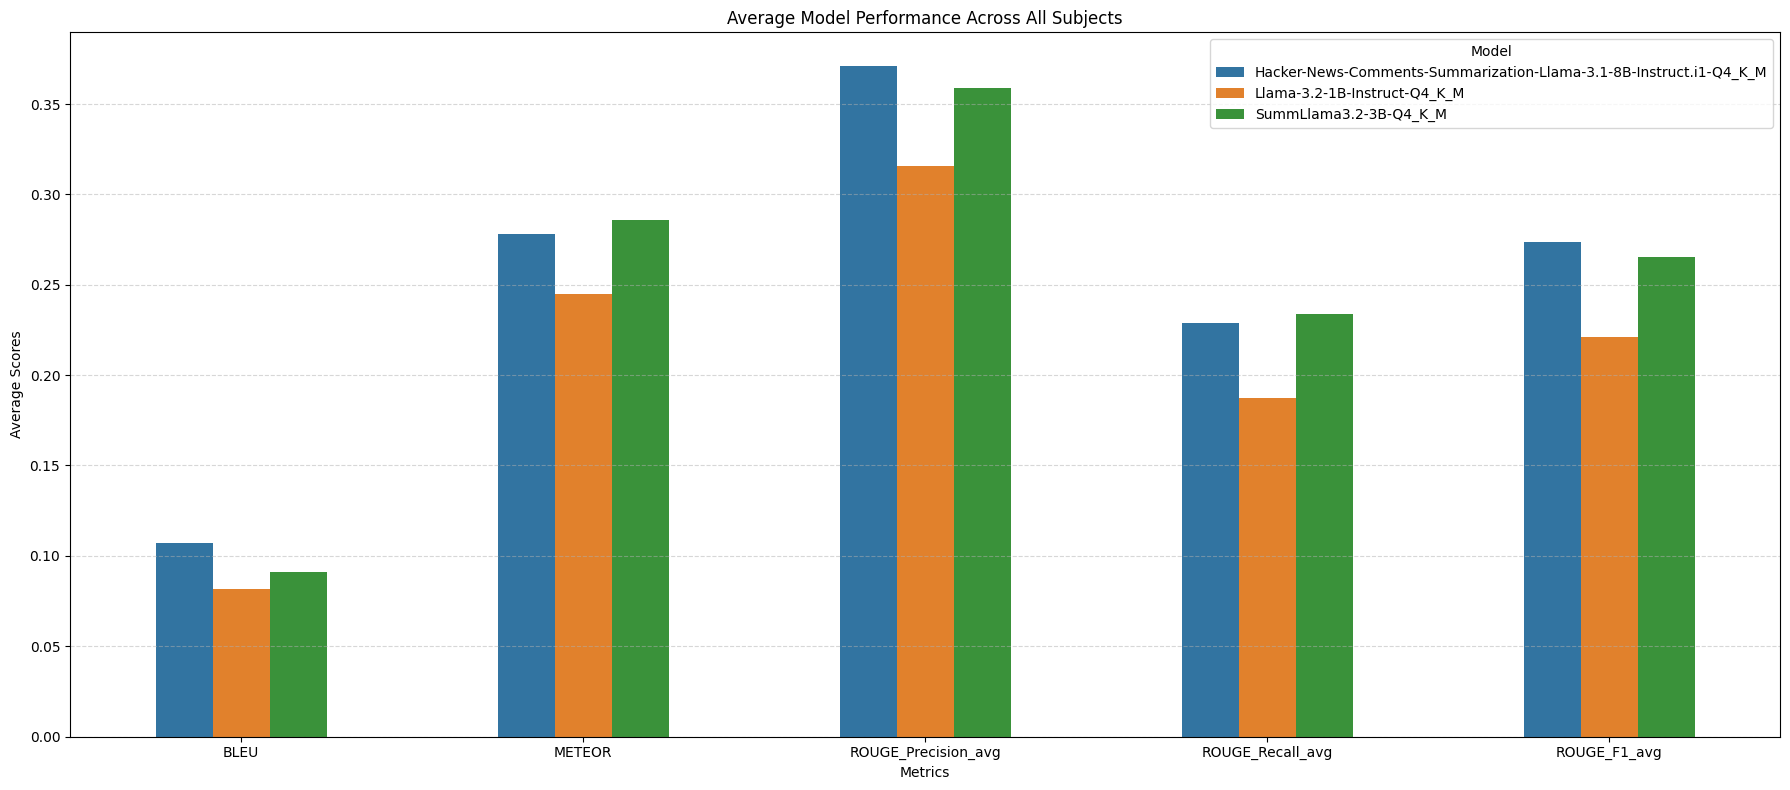

In [39]:
plot_text_summ_metrics_averages()

## Model Performance Metrics Diagrams

In [40]:
csv_dir_performance = "./outputs"
all_performance_files = [os.path.join(csv_dir_performance, f) for f in os.listdir(csv_dir_performance) if f.endswith(".csv")]

# Combine all performance files into a single DataFrame
df_all_performance = pd.concat([pd.read_csv(f) for f in all_performance_files], ignore_index=True)

In [41]:
def plot_performance_metrics(subject):
    df = df_all_performance[df_all_performance['Subject'] == subject].copy()
    
    # Melt the dataframe to long format for plotting (excluding Memory Usage)
    df_melted = pd.melt(df, id_vars=['Model', 'Subject'], value_vars=['Generation Time (seconds)', 'CPU Usage (%)', 'Token Count'],
                        var_name='Metric', value_name='Value')

    # Plot the performance metrics (excluding Memory Usage)
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted, x='Metric', y='Value', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Model Performance Metrics (excluding Memory Usage) for "{subject}"')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

    # Now plot Memory Usage on a separate diagram
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df, x='Model', y='Memory Usage (MB)', palette='tab10', width=0.2)
    plt.title(f'Memory Usage for "{subject}"')
    plt.xlabel('Model')
    plt.ylabel('Memory Usage (MB)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [42]:
widgets.interact(plot_performance_metrics, subject=dropdown)

interactive(children=(Dropdown(description='Subject:', layout=Layout(width='50%'), options=('football', 'IT', …

<function __main__.plot_performance_metrics(subject)>

In [43]:
def plot_average_performance_metrics():
    # Calculate the average values for all models across all subjects
    df_avg = df_all_performance.groupby(['Model'])[['Generation Time (seconds)', 'CPU Usage (%)', 'Token Count', 'Memory Usage (MB)']].mean().reset_index()

    # Melt the dataframe to long format for the summary plot (excluding Memory Usage)
    df_avg_melted = pd.melt(df_avg, id_vars=['Model'], value_vars=['Generation Time (seconds)', 'CPU Usage (%)', 'Token Count'],
                            var_name='Metric', value_name='Average Value')

    # Plot the summary metrics (average values) for all metrics except Memory Usage
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_avg_melted, x='Metric', y='Average Value', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Average Model Performance Metrics (excluding Memory Usage)')
    plt.xlabel('Metrics')
    plt.ylabel('Average Values')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

    # Plot Memory Usage on a separate diagram (average memory usage)
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_avg, x='Model', y='Memory Usage (MB)', palette='tab10', width=0.2)
    plt.title(f'Average Memory Usage for Models')
    plt.xlabel('Model')
    plt.ylabel('Average Memory Usage (MB)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


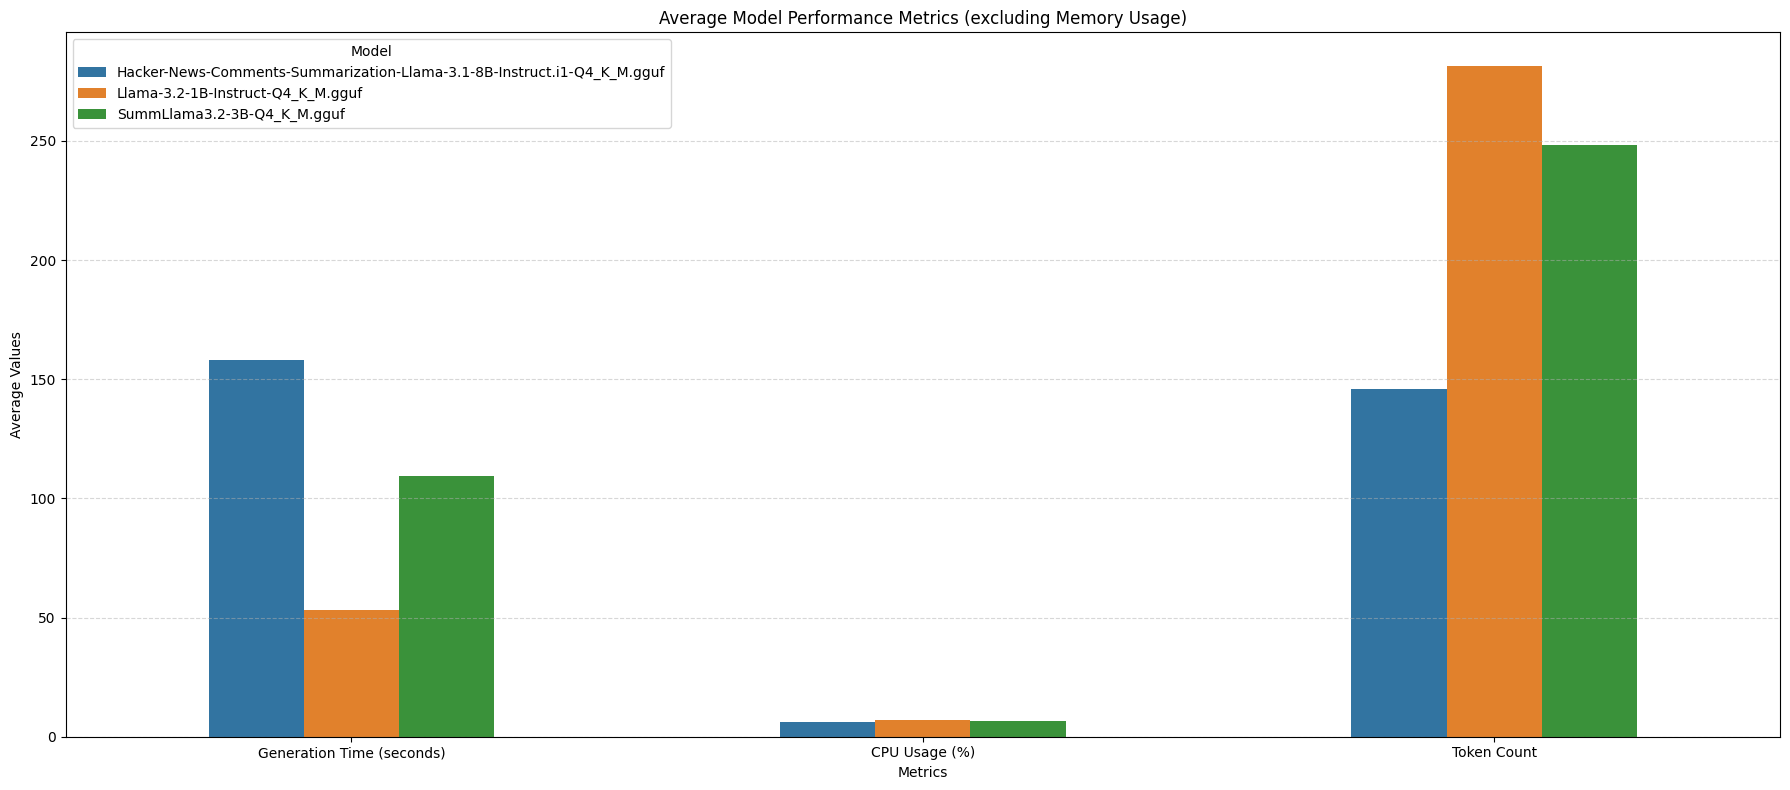

C:\Users\USER\AppData\Local\Temp\ipykernel_22656\1551005135.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avg, x='Model', y='Memory Usage (MB)', palette='tab10', width=0.2)


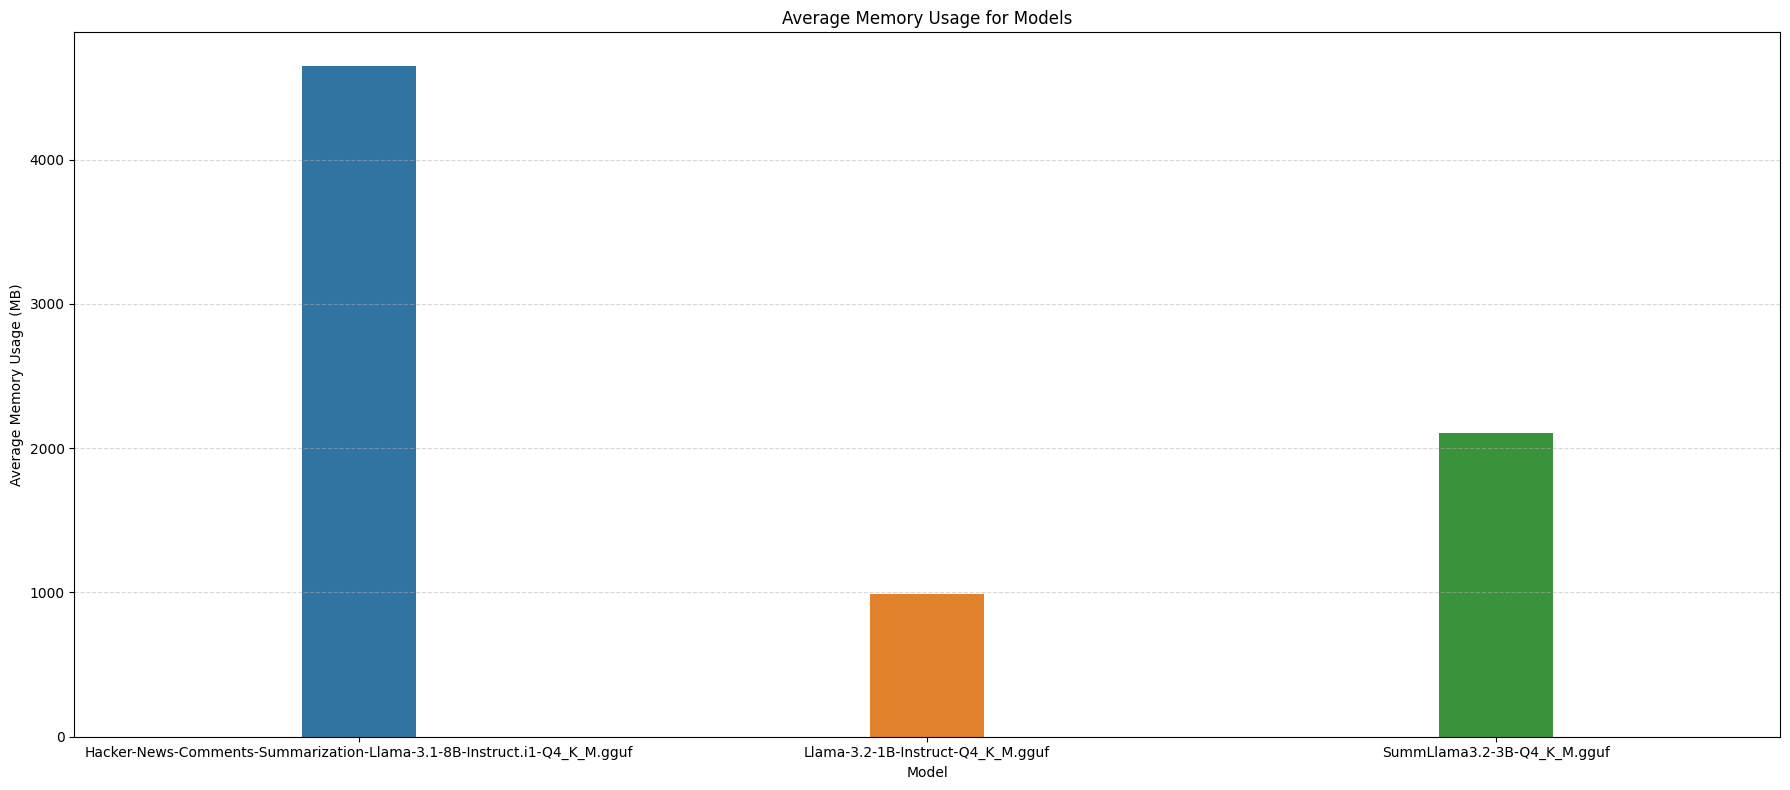

In [44]:
plot_average_performance_metrics()

## Model G-EVAL Metric Diagrams

In [45]:
csv_dir_g_eval = "./results"
all_g_eval_files = [os.path.join(csv_dir_g_eval, f) for f in os.listdir(csv_dir_g_eval) if f.endswith(".csv")]

# Combine all performance files into a single DataFrame
df_all_g_eval = pd.concat([pd.read_csv(f) for f in all_g_eval_files], ignore_index=True)

In [46]:
def plot_g_eval_metrics(subject):
    df = df_all_g_eval[df_all_g_eval['Subject'] == subject].copy()

    # Select relevant columns
    df_plot = df[['Model', 'Accuracy', 'Coherence', 'Concision']]
    df_melted = pd.melt(df_plot, id_vars='Model', var_name='Metric', value_name='Score')

    # Plot
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Model Comparison on Subject: "{subject}"')
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    #plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

In [47]:
widgets.interact(plot_g_eval_metrics, subject=dropdown)

interactive(children=(Dropdown(description='Subject:', layout=Layout(width='50%'), options=('football', 'IT', …

<function __main__.plot_g_eval_metrics(subject)>

In [48]:
def plot_average_g_eval_metric():
    # Select only numeric columns + Model
    df_subset = df_all_g_eval[['Model', 'Accuracy', 'Coherence', 'Concision']].copy()
    
    # Convert metrics to numeric (if necessary)
    for col in ['Accuracy', 'Coherence', 'Concision']:
        df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')

    # Calculate the average values for all models across all subjects
    df_avg = df_subset.groupby(['Model'])[['Accuracy', 'Coherence', 'Concision']].mean().reset_index()

    # Melt the dataframe to long format
    df_avg_melted = pd.melt(df_avg, id_vars=['Model'], value_vars=['Accuracy', 'Coherence', 'Concision'],
                            var_name='Metric', value_name='Average Value')

    # Plot
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_avg_melted, x='Metric', y='Average Value', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Average Model G-EVAL Metric')
    plt.xlabel('Metric')
    plt.ylabel('Average Values')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()


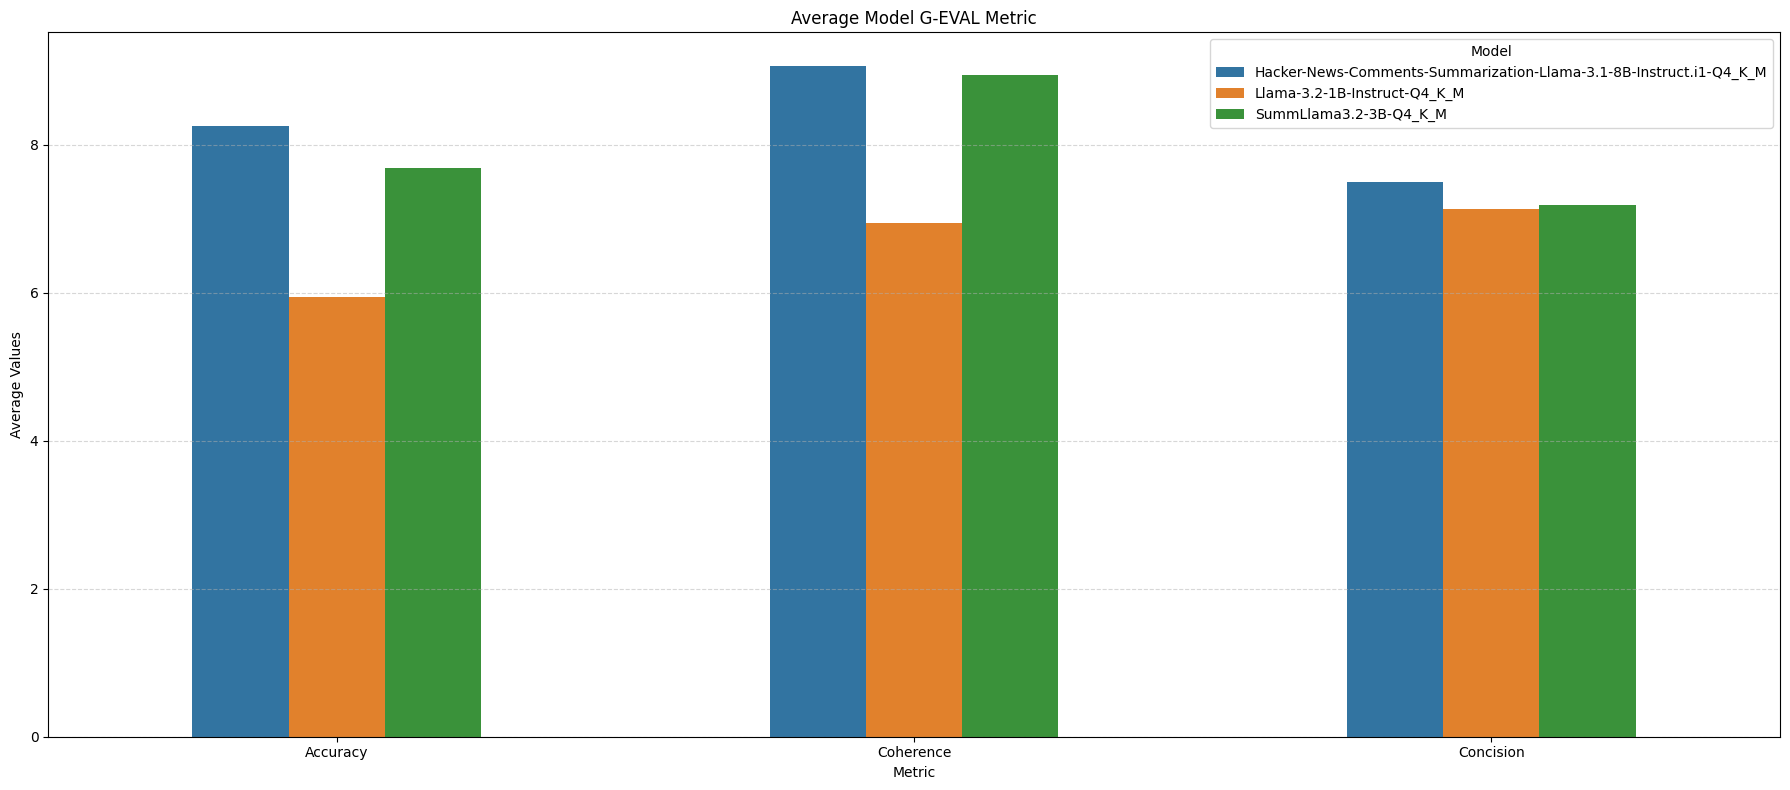

In [49]:
plot_average_g_eval_metric()

## Whisper and Beast output summary

C:\Users\USER\AppData\Local\Temp\ipykernel_22656\2016406536.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beast_whisper_df['Model_Name'] = prefix
C:\Users\USER\AppData\Local\Temp\ipykernel_22656\2016406536.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beast_whisper_df['Model_Name'] = prefix
C:\Users\USER\AppData\Local\Temp\ipykernel_22656\2016406536.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

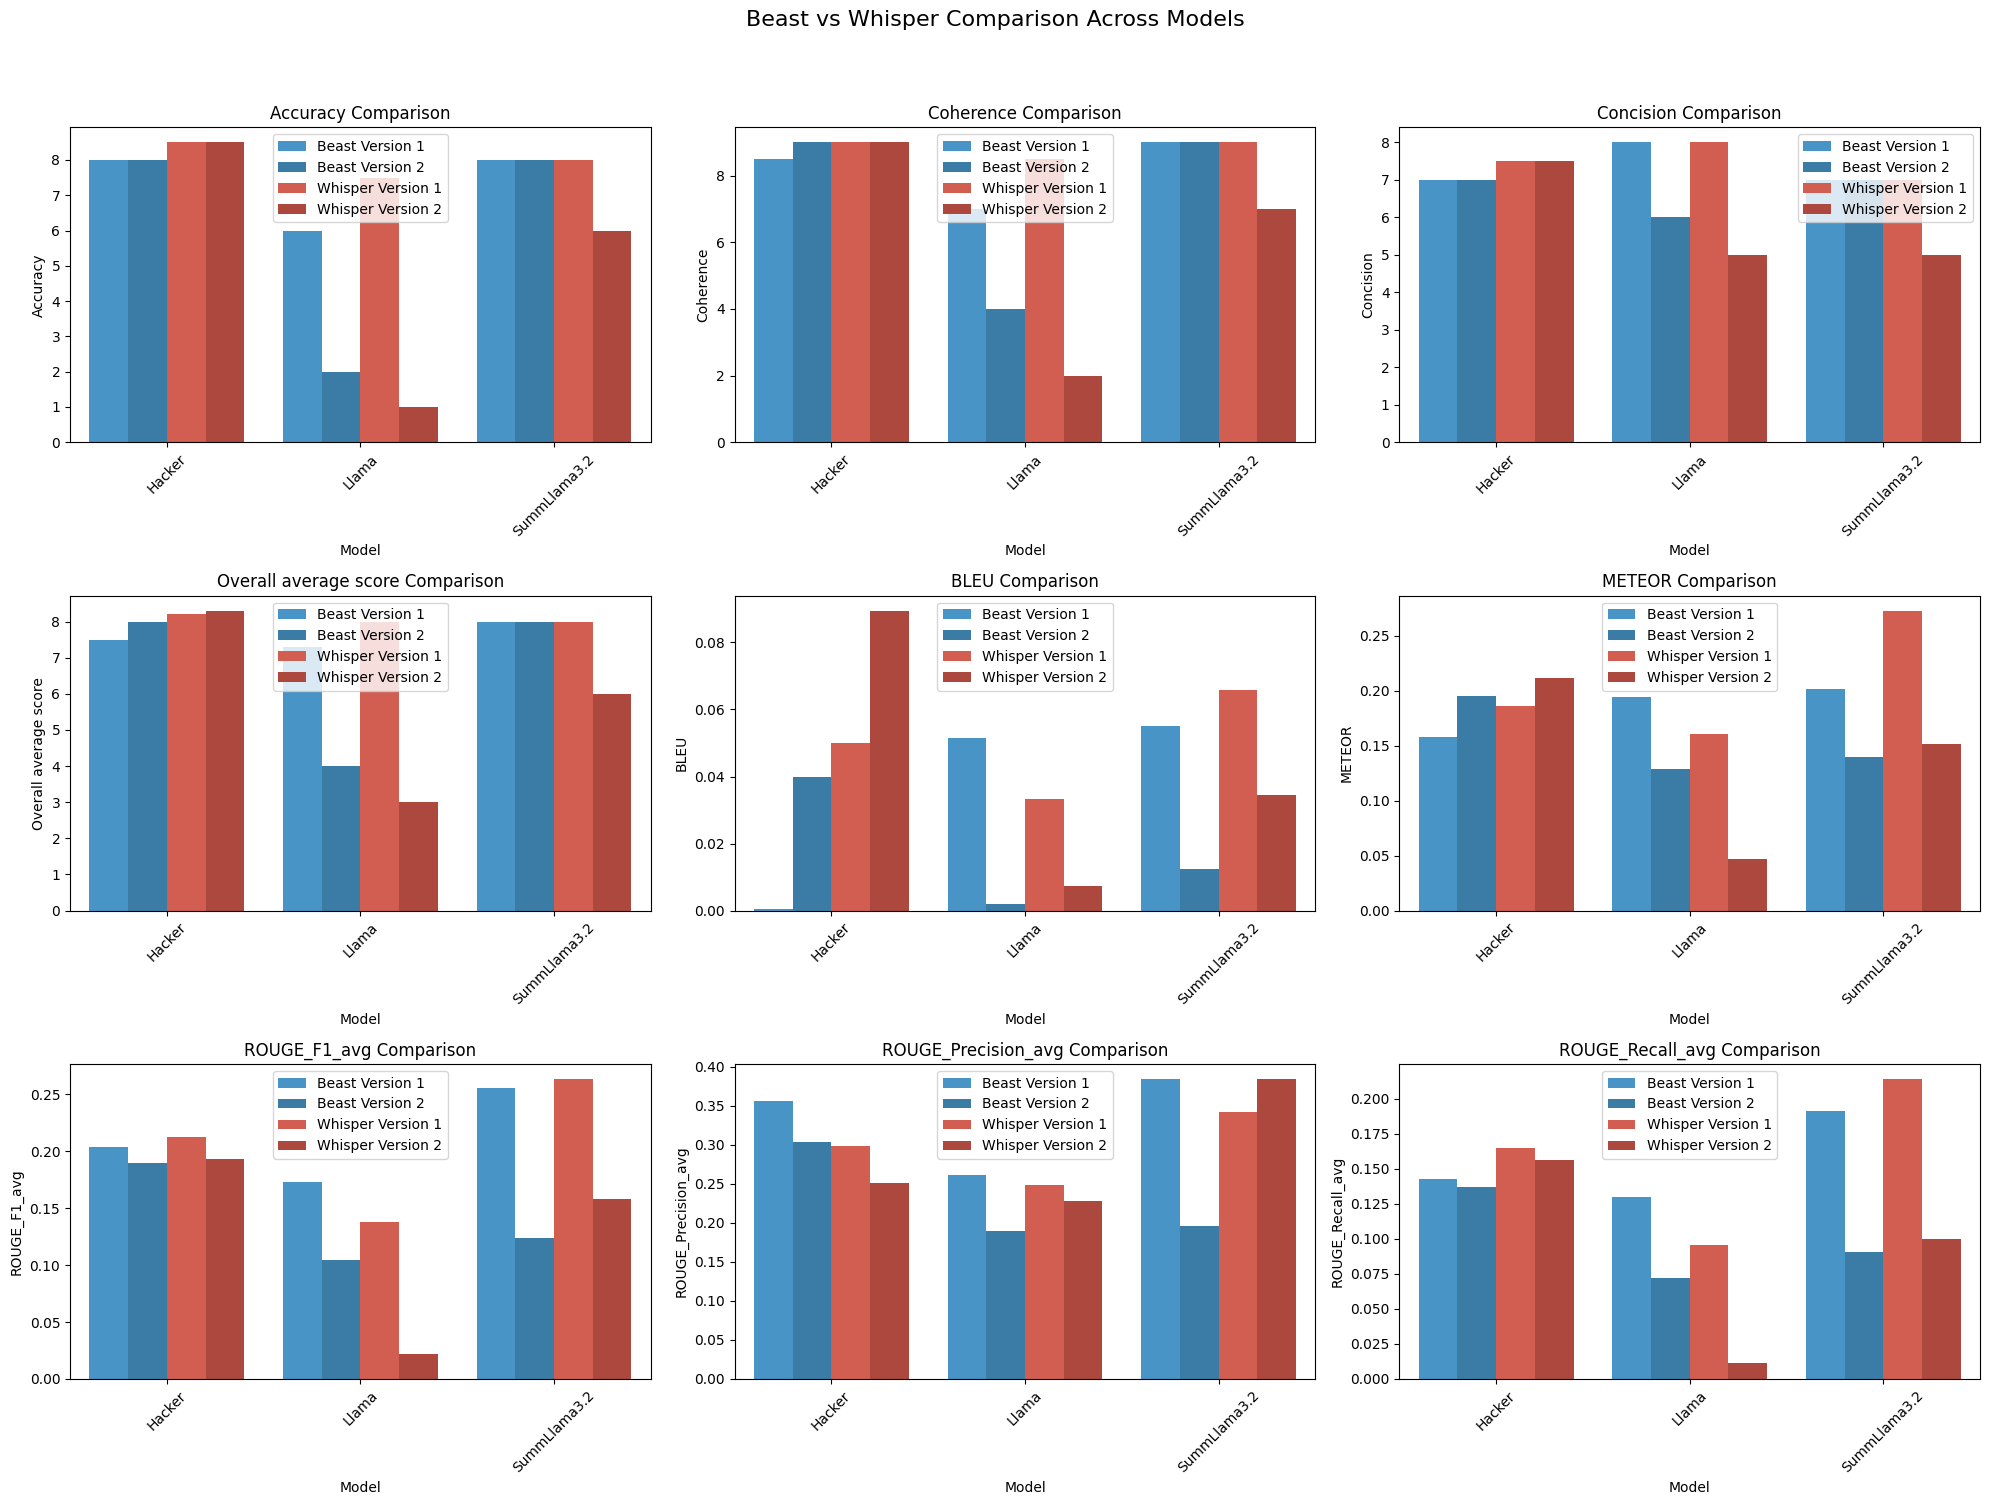

In [82]:
def plot_models_beast_vs_whisper_metrics():
    # Modell prefixek a fájlnevekből
    model_prefixes = [
        'Hacker-News-Comments-Summarization-Llama-3.1-8B-Instruct.i1-Q4_K_M',
        'Llama-3.2-1B-Instruct-Q4_K_M',
        'SummLlama3.2-3B-Q4_K_M'
    ]
    
    # Összegyűjtjük az összes modell adatait
    all_models_df = pd.DataFrame()
    
    for prefix in model_prefixes:
            # Beolvassuk a két CSV fájlt az adott modellhez
            eval_file = f'./results/{prefix}.gguf_g_eval_metrics.csv'
            auto_file = f'./results/{prefix}.gguf_metrics.csv'
            
            if os.path.exists(eval_file) and os.path.exists(auto_file):
                eval_metrics = pd.read_csv(eval_file)
                auto_metrics = pd.read_csv(auto_file)
                
                # Egyesítjük az adatokat
                df_merged = pd.merge(eval_metrics, auto_metrics, on=['Model', 'Subject'])
                
                # Csak a Beast és Whisper adatokat vesszük figyelembe
                beast_whisper_df = df_merged[df_merged['Subject'].str.contains('beast|whisper')]
                
                if not beast_whisper_df.empty:
                    # Hozzáadjuk a modell azonosítót (a fájlnév alapján)
                    beast_whisper_df['Model_Name'] = prefix
                    
                    # Összefűzzük a többi modell adataival
                    all_models_df = pd.concat([all_models_df, beast_whisper_df])
    
    
    # Típus és verzió oszlopok létrehozása
    all_models_df['Type'] = all_models_df['Subject'].apply(
        lambda x: 'Beast' if 'beast' in x else 'Whisper')
    all_models_df['Version'] = all_models_df['Subject'].apply(
        lambda x: 'Version 2' if '_2' in x else 'Version 1')
    
    # ROUGE átlagok számítása
    all_models_df['ROUGE_Precision_avg'] = all_models_df[['ROUGE-1 Precision', 'ROUGE-2 Precision', 'ROUGE-L Precision']].mean(axis=1)
    all_models_df['ROUGE_Recall_avg'] = all_models_df[['ROUGE-1 Recall', 'ROUGE-2 Recall', 'ROUGE-L Recall']].mean(axis=1)
    all_models_df['ROUGE_F1_avg'] = all_models_df[['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1']].mean(axis=1)
    
    # Kiválasztjuk az összes metrikát az összehasonlításhoz
    metrics = ['Accuracy', 'Coherence', 'Concision', 'Overall average score', 
              'BLEU', 'METEOR', 'ROUGE_F1_avg', 'ROUGE_Precision_avg', 'ROUGE_Recall_avg']
    
    # Ábra méretének beállítása metrikák számától függően
    n_metrics = len(metrics)
    n_cols = 3
    n_rows = (n_metrics + n_cols - 1) // n_cols
    
    # Ábra létrehozása
    plt.figure(figsize=(20, 5 * n_rows))
    
    # Minden metrikához egy subplot
    for i, metric in enumerate(metrics, 1):
        plt.subplot(n_rows, n_cols, i)
        
        # Előkészítjük az adatokat a barplot-hoz
        comparison_df = all_models_df.pivot_table(
            index=['Model_Name', 'Type', 'Version'],
            values=metric,
            aggfunc=np.mean
        ).reset_index()
        
        # Modellnevek rövidítése
        comparison_df['Short_Model'] = comparison_df['Model_Name'].apply(lambda x: x.split('-')[0])
        
        # Kombinált típus és verzió
        comparison_df['Type_Version'] = comparison_df['Type'] + ' ' + comparison_df['Version']
        
        # Létrehozzuk a barplot-ot
        sns.barplot(
            data=comparison_df,
            x='Short_Model', 
            y=metric, 
            hue='Type_Version',
            palette=['#3498db', '#2980b9', '#e74c3c', '#c0392b']
        )
        plt.title(f'{metric} Comparison')
        plt.xlabel('Model')
        plt.ylabel(metric)
        plt.legend(title='')
        plt.xticks(rotation=45)
    
    plt.suptitle('Beast vs Whisper Comparison Across Models', fontsize=16, y=1.0)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


plot_models_beast_vs_whisper_metrics()